# K-means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('C:\\Users\\Ankit\\Desktop\\TSF\\Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


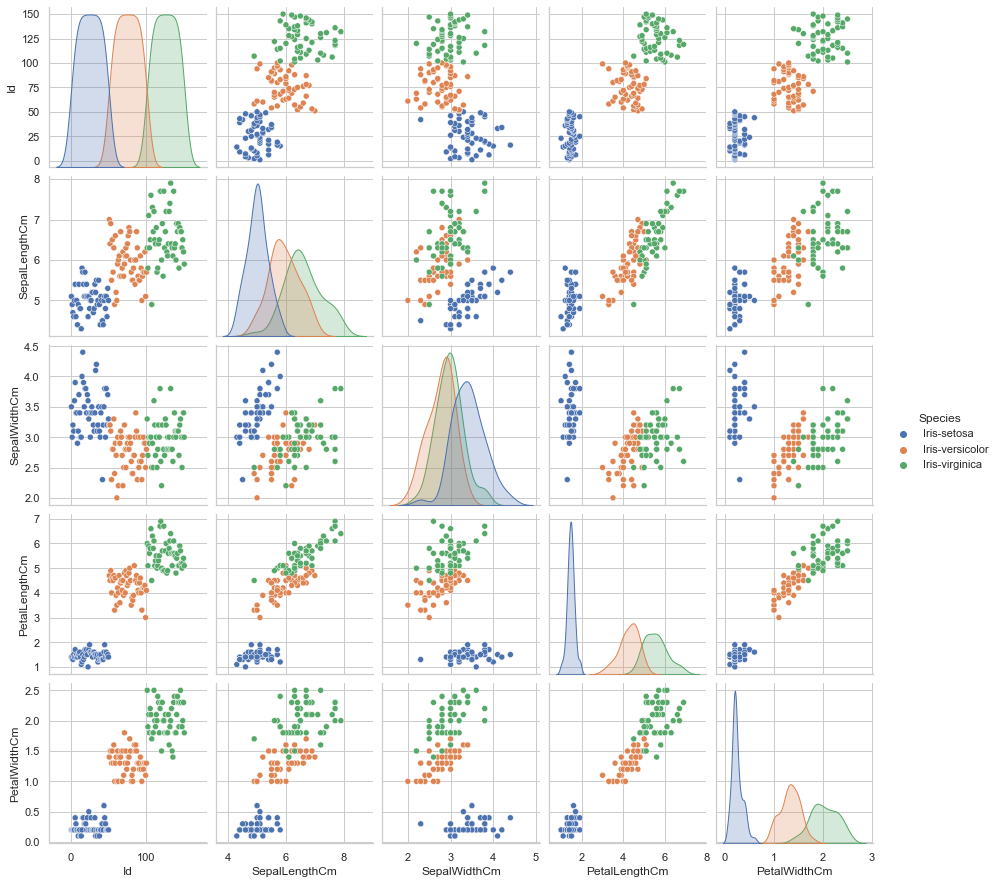

In [26]:
sns.pairplot(df,  hue = 'Species' )

In [43]:
print(df.isnull().values.any())

False


In [42]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


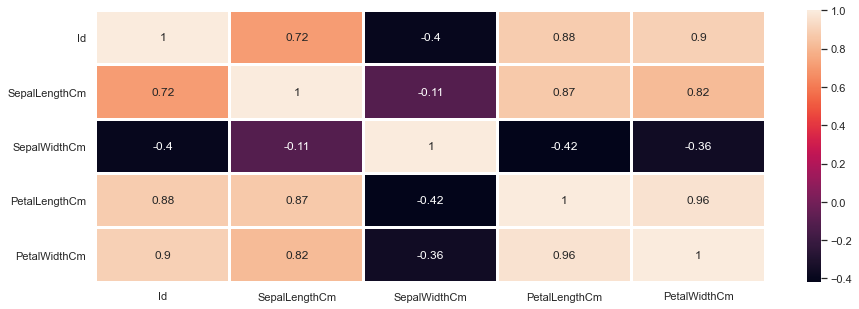

In [41]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot = True,linewidths = 2)
plt.show()

In [6]:
x = df.iloc[:, [0, 1, 2, 3]].values # used to suitable independent features

In [7]:
from sklearn.cluster import KMeans

In [8]:
no_of_clusters = 11
wcss = []
for i in range(1,no_of_clusters):
    k_mea = KMeans(n_clusters=i , init = 'k-means++', max_iter=300 , n_init= 10,random_state=0)
    k_mea.fit(x)
    wcss.append(k_mea.inertia_)

print(wcss)
    

[281831.54466666665, 70581.3808, 31320.711199999998, 17758.79250355619, 11468.96874702381, 7921.863473076923, 5911.632365518539, 4541.979023391813, 3571.9110955882356, 2943.933100840336]


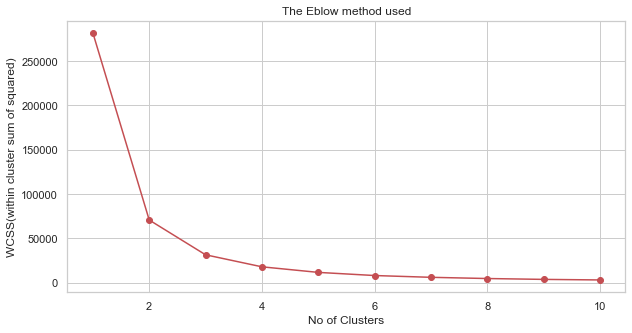

In [17]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
plt.plot(range(1,11),wcss, marker = 'o', color = 'r')
plt.title('The Eblow method used')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS(within cluster sum of squared)')
plt.show()

So from this Eblow method we are find optimal no. of clusters(K) = 3

In [10]:
k_mea_1 = KMeans(n_clusters = 3 ,init = 'k-means++',max_iter = 300 , n_init = 10 , random_state = 0 )
k_mea_1.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
y_pred = k_mea_1.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

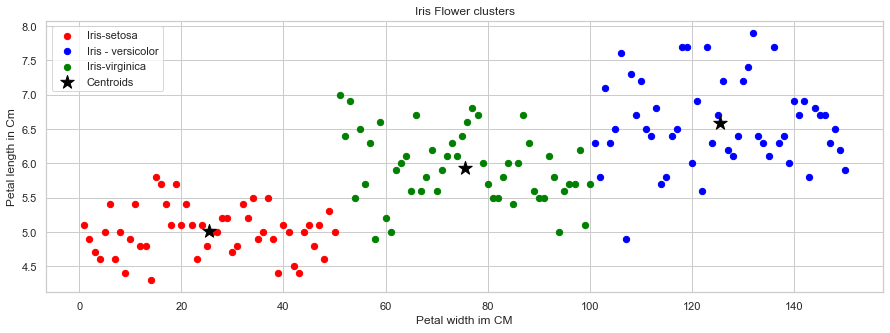

In [44]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')

size = 40
plt.scatter(x[y_pred ==  0,0] ,  x[y_pred == 0,1] , s = size,  c = 'red'   , label = 'Iris-setosa')
plt.scatter(x[y_pred ==  1,0] ,  x[y_pred == 1,1] , s = size,  c = 'blue'  , label = 'Iris - versicolor')
plt.scatter(x[y_pred ==  2,0] ,  x[y_pred == 2,1] , s = size,  c = 'green' , label = 'Iris-virginica')

plt.scatter(k_mea_1.cluster_centers_[:,0] , k_mea_1.cluster_centers_[:,1] , s = 200 ,c ='black' , label = 'Centroids' ,marker = '*')
plt.legend()

plt.title('Iris Flower clusters')
plt.xlabel('Petal width im CM')
plt.ylabel('Petal length in Cm')
plt.show()